# Team Project 4 - Linear Algebra and Data Compression

Linear algebra provides many powerful and interesting applications. Examples include:
<ul>
    <li>Face recognition via Eigenface;</li>
    <li>Image compression using Singular Value Decomposition;</li>
    <li>JPEG/MPEG compression via discrete cosine transform;</li>
    <li>Signal/sound compression via Fourier series.</li>
</ul>
A common feature is that by using technique of linear algebra, one may find a very nice approximation of given data (in a very big or even infinite dimensional vector space) in a reasonable small vector space. 

In this project, we investigate how to compress continous sound data by using finitely many numbers.

Sound data is given as a continuous function $f(t)$. If we divide the time interval into reasonably small subintervals, then on each interval the function $f(t)$ looks like a periodic function, because sound is a vibration that propagates as a (in general very complicated) wave of pressure and a wave is periodic. From now on, for simplicity, assume that the period of $f(t)$ is $2\pi$ and we will assume that $f(t) \in C([-\pi, \pi])$. 

On $C([-\pi, \pi])$, the following formula yields an inner product:
$$(g, h) = \frac{1}{\pi}\int_{-\pi}^{\pi}g(t)h(t)dt.$$
Furthermore, from homework, we know that the following set is an orthonormal set. 
$$B_n := \{\frac{1}{\sqrt{2}}, \sin t, \cos t, \sin 2t, \cos 2t, \cdots, \sin nt, \cos nt\}$$
Let $W_n$ be the sub vector space of $C([-\pi, \pi])$ generated by $B_n$. Then for any $f(t) \in C([-\pi, \pi])$, its best approximation in $W_n$ is given by
$$\hat{f}_n(t) := (f(t), \frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} + \sum_{k=1}^n (f(t), \sin kt)\sin kt + \sum_{k=1}^n (f(t), \cos kt)\cos kt.$$

#### 1. (20 pts) Construct a function Simpson(f, m) which evaluates the definite integral $$\int_{-\pi}^{\pi}f(t)dt$$ with $m$ intervals by using Simpson's rule. Note that $m$ has to be an even number.

In [40]:
import math
import numpy as np

def Simpson(f,m):
    lower_bound = math.pi*-1       #this is an input
    upper_bound = math.pi    #this is an input
    
    delX = (upper_bound - lower_bound)/m
    iterT = lower_bound
    sumI = 0.0
    for i in range (m+1):
        if(i==0 or i==m):
            sumI = sumI + f(iterT)
        else:
            if(i%2==0):
                sumI = sumI + (2*f(iterT))
            else:
                sumI = sumI + (4*f(iterT))
        iterT = iterT + delX
        

    sumI = sumI * (delX/3)
    return sumI

#### 2. (15 pts) Create a function FourierCoeff(f, n) which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$ where $a_0 = (f(t), \frac{1}{\sqrt{2}})$, $a_k = (f(t), \cos kt)$ for $k \ge 1$, $b_k = (f(t), \sin kt)$. To calculate each coefficient, use the function Simpson(f, m) with $m = 20$.

In [53]:
def FourierCoeff(f, n):
    arr = np.zeros((2*n)+1)
    intervals = 20
    scale = 1
    for i in range ((2*n)+1):
        if (i==0):
            arr[i] = (1/(math.pi*math.sqrt(2)))*Simpson(f,intervals)
        else:
            if(i%2==0):
                arr[i] = (1/math.pi)*Simpson(lambda x:f(x)*math.cos(scale*x), intervals)
                scale = scale+1
            else:
                arr[i] = (1/math.pi)*Simpson(lambda x:f(x)*math.sin(scale*x), intervals)
    return arr

Note that the initial data is a continuous function, but the approximation is recorded as a list of $2n+1$ numbers!

#### 3. (15 pts) Create a function FourierApprox(f, n) which plots the graphs of $f(t)$ and $\hat{f}_n(t)$ with $n = 1, 2, 3, 5, 10$ over $[-\pi, \pi]$ on the same plane (perhaps with different color). Test your function with $f(t) = \frac{t}{\pi}$ and $f(t) = \sqrt{\pi^2-t^2}$. Run the function with your favorite $f(t)$, too.

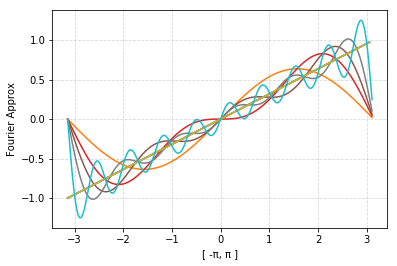

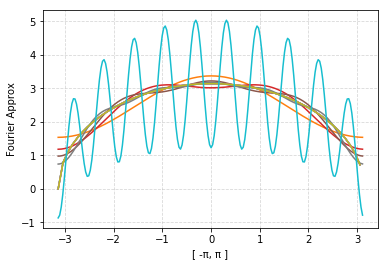

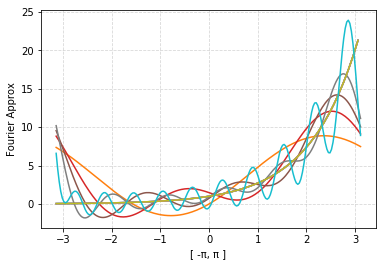

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import math

def funcOne(x):
    return x/np.pi 
    
def funcTwo(x):
    return np.sqrt((math.pi*math.pi)-(x*x))

def myFaveFunc(x):
    return np.exp(x)

def FourierApproxInternal(f,n):
    
    #plotting original function
    x0 = np.pi*-1
    xn = np.pi
    plt.grid(alpha=.5,linestyle='--')
    plt.xlabel("[ -π, π ]")
    plt.ylabel("Fourier Approx")
    
    x = np.arange(x0,xn,0.1)
    y = f(x)
    plt.plot(x,y)

    #plotting approximation in Wn
    points = 200
    increment = (xn-x0)/(points)
    a = np.arange(x0,xn,increment)
    b = np.zeros(points)
    
    track = x0
    arr = FourierCoeff(f,n)
    
    for i in range(points):
        #first term in approximation equation
        num = 0
        num = num + (arr[0]*(1/math.sqrt(2)))
        
        #remaining terms - there are two summations 
        scale = 1
        for k in range((2*n)):
            if((k+1)%2==1):
                num = num + (arr[k+1]*math.sin(scale * track))
            else:
                num = num + (arr[k+1]*math.cos(scale * track))
                scale = scale+1
        
        b[i]=num
        track = track + increment 
    plt.plot(a,b) 
            
def FourierApprox(f,n):
    plt.figure()
    for i in range(len(n)):
        FourierApproxInternal(f,n[i])
    
def main():
    n = [1,2,3,5,10]
    FourierApprox(funcOne, n)
    FourierApprox(funcTwo, n)
    FourierApprox(myFaveFunc, n)
    
main()